# 🧬 Single-Cell RNA-seq Analysis with Scanpy

This notebook walks through a **complete single-cell RNA-seq (scRNA-seq)** data analysis pipeline using the Python package **Scanpy**.  
It is written for **beginners** in single-cell bioinformatics — especially those coming from a biology background.

We'll go step-by-step through:
1. Loading and preprocessing data  
2. Quality control (QC)  
3. Normalization and feature selection  
4. Dimensionality reduction (PCA, UMAP)  
5. Clustering  
6. Marker gene detection and visualization

By the end of this notebook, you’ll understand not only *how* to perform each step, but also *why* it’s important.

---


### Installation

In [1]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 58.0 MB/s eta 0:00:00


In [2]:
!pip install anndata

In [3]:
!pip3 install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 112.6 MB/s eta 0:00:00


In [4]:
!pip install celltypist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 59.3 MB/s eta 0:00:00


In [5]:
!pip install decoupler

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.2 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19876 sha256=50ff3feaaf885b8fc0d9442680ad5bb16aebc250860150c6d3a5634cff91c6cb
  Stored in directory: /root/.cache/pip/wheels/d6/19/ee/0a6a1793d91c449563b49ccab57ce52da3e6fab7614836bd8c
Successfully built docrep
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [6]:
!pip install fa2-modified

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.8/620.8 kB 27.5 MB/s eta 0:00:00


### 🧩 Loading Data
In this step, we load the single-cell expression matrix into an **AnnData** object — the core data structure in Scanpy.
It contains:
- `adata.X`: the expression matrix (cells × genes)
- `adata.obs`: metadata for each cell
- `adata.var`: metadata for each gene


In [20]:
#Import core single cell tools

import scanpy as sc
import anndata as ad

In [16]:
#!wget https://cf.10xgenomics.com/samples/cell-vdj/8.0.1/10k_5p_Human_diseased_PBMC_ALL_Fresh/10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5

In [22]:
#fresh_blood_adata = sc.read_10x_h5('bone_marrow.h5ad')
adata = sc.read("bone_marrow.h5ad")


In [23]:
fresh_blood_adata=adata
print(fresh_blood_adata)

AnnData object with n_obs × n_vars = 14783 × 17374
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'doi', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'


In [24]:
# the dimensions of our dataset
fresh_blood_adata.shape

(14783, 17374)

In [ ]:
#14783 cells
#17374 genes

In [25]:
# let's look at the first 5 rows describing the genes in our dataset
fresh_blood_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding


In [26]:
# let's look at the first 5 rows describing the cells (ID) in our dataset
fresh_blood_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,is_primary_data,suspension_type,tissue_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,2P)e%zgsv_
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,78-year-old stage,Lv&N1yD6*0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,DZ>`^5OH2o
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,J4$QmqEgvX
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,Y&7u#&E`-T


In [27]:
# How about both. in a proper dataframe format

fresh_blood_adata.to_df()

,ENSG00000161920,ENSG00000122335,ENSG00000175548,ENSG00000100330,ENSG00000176340,ENSG00000179846,ENSG00000204860,ENSG00000172260,ENSG00000141424,ENSG00000164512,...,ENSG00000164114,ENSG00000151702,ENSG00000224578,ENSG00000138756,ENSG00000111052,ENSG00000176946,ENSG00000150456,ENSG00000284934,ENSG00000261842,ENSG00000260456
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.0,0.000000,0.0,0.0,9.436466,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,8.817776,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,0.0,8.651494,0.0,0.0,8.651494,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,0.0,0.000000,0.0,0.0,8.858533,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guo-TTTGTCAGTTTCGCTC-4,0.0,0.000000,0.0,0.0,8.389465,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGAGACG-7,0.0,0.000000,0.0,0.0,9.931639,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGATAAG-4,0.0,0.000000,0.0,0.0,10.009642,0.0,0.0,0.0,0.000000,0.0,...,0.0,9.01104,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 🧹 Quality Control (QC)
QC ensures we only keep high-quality cells and informative genes.
Typical filters remove:
- Harmonize unique gene names (avoid gene duplications from old pipelines)
- Cells with too few genes (likely dead)
- Cells with too many genes (possible doublets)
- Genes expressed in very few cells (uninformative)


In [10]:
!wget wget -O result.txt 'http://www.ensembl.org/biomart/martservice?query=<?xml version="1.0" encoding="UTF-8"?><!DOCTYPE Query><Query  virtualSchemaName = "default" formatter = "CSV" header = "0" uniqueRows = "0" count = "" datasetConfigVersion = "0.6" ><Dataset name = "hsapiens_gene_ensembl" interface = "default" ><Attribute name = "ensembl_gene_id" /><Attribute name = "external_gene_name" /></Dataset></Query>'


#this downloads the table of genes directly from ensemble

--2025-12-26 05:42:24--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2025-12-26 05:42:25--  http://www.ensembl.org/biomart/martservice?query=%3C?xml%20version=%221.0%22%20encoding=%22UTF-8%22?%3E%3C!DOCTYPE%20Query%3E%3CQuery%20%20virtualSchemaName%20=%20%22default%22%20formatter%20=%20%22CSV%22%20header%20=%20%220%22%20uniqueRows%20=%20%220%22%20count%20=%20%22%22%20datasetConfigVersion%20=%20%220.6%22%20%3E%3CDataset%20name%20=%20%22hsapiens_gene_ensembl%22%20interface%20=%20%22default%22%20%3E%3CAttribute%20name%20=%20%22ensembl_gene_id%22%20/%3E%3CAttribute%20name%20=%20%22external_gene_name%22%20/%3E%3C/Dataset%3E%3C/Query%3E
Resolving www.ensembl.org (www.ensembl.org)... 193.62.193.83
Connecting to www.ensembl.org (www.ensembl.org)|193.62.193.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘result.txt’

result.txt              [     <=>       

In [11]:
import pandas as pd

ensembl_var = pd.read_csv('/content/result.txt', header = None)

ensembl_var.columns = ['ensembl_gene_id', 'gene_name']

ensembl_var.head(3)

,ensembl_gene_id,gene_name
0,ENSG00000210049,MT-TF
1,ENSG00000211459,MT-RNR1
2,ENSG00000210077,MT-TV


In [12]:
import decoupler as dc
# Query Omnipath and get PanglaoDB
markers = dc.op.resource(name="PanglaoDB", organism="human")

# Keep canonical cell type markers alone
#markers = markers[markers["canonical_marker"]]

# Remove duplicated entries
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

#Format because dc only accepts cell_type and genesymbol

markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]


markers.head()


,source,target
,,
0,Hepatocytes,A1CF
1,Germ cells,A2APA5
2,Bergmann glia,A2M
3,Mast cells,A3FIN4
4,Mast cells,A4GALT


In [13]:
#correct target to ensemble
markers = markers.merge(ensembl_var, left_on="target", right_on="gene_name", how="left")
markers = markers.drop(columns=["target"])
# Remove duplicated entries
markers = markers[~markers.duplicated(["source", "ensembl_gene_id"])]

#Format because dc only accepts cell_type and genesymbol
markers = markers.rename(columns={"source": "source", "ensembl_gene_id": "target"})

markers = markers[["source", "target"]]
markers = markers.dropna()

markers.head()

,source,target
0,Hepatocytes,ENSG00000148584
2,Bergmann glia,ENSG00000175899
4,Mast cells,ENSG00000128274
6,Interneurons,ENSG00000115977
7,Neurons,ENSG00000115977


In [28]:
adata

AnnData object with n_obs × n_vars = 14783 × 17374
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'doi', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [29]:
import scanpy as sc

# Basic preprocessing (if not done)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var.highly_variable]

sc.pp.scale(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)


/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
/tmp/ipython-input-1631130852.py:14: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


In [34]:
import decoupler as dc

# dc.mt.ulm(
#     adata,
#     net=markers,
#     source='source',
#     target='target',
#     min_n=5,
#     verbose=True
# )

dc.mt.ulm(data=adata,
          net=markers,
          tmin = 3)


In [35]:
adata.obsm.keys()


KeysView(AxisArrays with keys: X_pca, X_tsne, X_umap, score_ulm, padj_ulm)

In [36]:
import pandas as pd

acts = pd.DataFrame(
    adata.obsm['score_ulm'],
    index=adata.obs_names
)

acts.head()


,Acinar cells,Adipocytes,Alpha cells,Alveolar macrophages,Anterior pituitary gland cells,Astrocytes,B cells,B cells memory,B cells naive,Basal cells,...,T cells naive,T cytotoxic cells,T follicular helper cells,T helper cells,T memory cells,Tanycytes,Thymocytes,Trigeminal neurons,Trophoblast cells,Tuft cells
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.857471,1.332592,-0.195479,5.129627,-0.398715,0.101666,-1.040681,-1.669000,-0.905676,-0.630953,...,-0.451933,-1.397637,-1.063184,-1.821024,-1.874940,0.725703,-1.424492,-0.457763,-0.303246,-0.425272
Guo-AAACCTGAGAGGTTGC-7,-0.321504,-0.528583,-0.039163,-0.362476,-0.307452,-0.638291,-2.771050,-1.423667,-0.132087,1.382588,...,1.509781,-1.592366,0.165175,0.996349,-1.193104,1.026315,-0.226677,-0.385401,-0.147499,-0.278666
Guo-AAACCTGAGATACACA-3,-0.475042,0.404555,-0.214063,-0.574618,-0.410676,-0.806844,-0.046524,-0.030182,0.138204,-0.651200,...,-0.370199,1.292374,-0.154991,0.421420,-0.311556,0.498920,0.734414,1.436603,-0.322187,-0.443647
Guo-AAACCTGAGCGATTCT-1,-0.462540,0.678423,-0.153814,-0.546544,-0.415114,0.206119,0.696293,-1.049284,-1.173594,-0.651771,...,-1.944056,-1.684637,-1.217901,-1.137280,-0.467243,-0.773161,-0.319485,-0.491034,-0.277255,-0.420816
Guo-AAACCTGAGTGAAGAG-3,-0.344188,-0.549652,-0.077090,-0.126916,-0.319329,-0.652645,-0.605473,-0.588224,-0.475507,-0.497105,...,0.336197,-1.485852,-1.028786,-0.734825,-0.591412,-0.624028,-1.477219,-0.389710,-0.181375,-0.305510


In [37]:
cluster_acts = acts.groupby(adata.obs['leiden']).mean()

cluster_acts


/tmp/ipython-input-2526606986.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_acts = acts.groupby(adata.obs['leiden']).mean()


,Acinar cells,Adipocytes,Alpha cells,Alveolar macrophages,Anterior pituitary gland cells,Astrocytes,B cells,B cells memory,B cells naive,Basal cells,...,T cells naive,T cytotoxic cells,T follicular helper cells,T helper cells,T memory cells,Tanycytes,Thymocytes,Trigeminal neurons,Trophoblast cells,Tuft cells
leiden,,,,,,,,,,,,,,,,,,,,,
0,-0.277636,-0.076233,0.102341,-0.762798,0.058145,0.132776,-0.842730,-0.381240,-0.247032,-0.052246,...,1.013458,0.688697,0.534739,0.877487,1.433572,-0.112677,0.250666,-0.047178,0.035547,-0.153301
1,-0.265008,-0.263667,-0.023100,-0.325077,-0.061537,-0.441000,-1.769496,-1.208545,-1.158911,0.028602,...,-0.173371,0.115682,0.106819,0.093350,0.080270,-0.302849,-0.533918,0.180745,-0.066306,-0.173528
2,-0.196685,-0.267757,-0.083549,0.300908,-0.001332,-0.188704,0.562208,-0.385259,-0.503889,-0.025241,...,-0.661257,-0.087784,-0.310807,-0.161410,-0.241883,-0.221661,0.275922,0.109706,-0.147465,-0.152738
3,1.974125,1.216553,-0.135775,5.280995,-0.189223,0.358916,-0.465527,-1.086177,-0.813559,0.157721,...,-0.635040,-1.263114,-0.483253,-1.162648,-1.407215,1.186776,-0.698919,-0.145475,0.350451,-0.128271
4,-0.230590,-0.348414,-0.147436,-0.779239,-0.227565,-0.149520,5.986027,5.925483,6.682665,-0.121740,...,-0.571084,-0.101570,-0.554784,-0.492126,-1.010055,-0.253299,0.330190,0.003985,-0.218985,1.055862
5,-0.268728,-0.259510,-0.060789,-0.127303,-0.029300,-0.486837,-1.698406,-1.104776,-1.131150,-0.010653,...,-1.004664,-1.006433,-0.744805,-0.908852,-1.429166,-0.347276,-0.377655,0.099479,-0.136619,-0.152695
6,-0.194577,-0.395037,-0.062967,-0.607443,0.395495,-0.300750,4.499080,2.322216,0.048187,-0.118287,...,-1.126285,-0.361739,-0.649638,-0.623535,-1.979039,-0.094332,0.639470,-0.236789,-0.209238,-0.285028
7,1.098097,1.176013,-0.147587,0.163828,-0.192642,0.228210,-1.733187,-1.551288,-1.007115,-0.058903,...,-0.347714,-1.347995,-0.069417,-1.168922,-1.441022,1.025813,-0.756989,0.014126,0.413147,-0.005299
8,-0.264111,-0.146254,0.038266,-0.353851,0.136178,0.255153,0.729353,0.178661,0.210571,0.055619,...,0.605686,0.870331,0.236883,0.721275,1.522111,-0.155777,0.924986,0.018838,-0.021698,-0.240306


In [38]:
cluster_to_celltype = cluster_acts.idxmax(axis=1)
cluster_to_celltype


,0
leiden,
0,T memory cells
1,Gamma delta T cells
2,NK cells
3,Monocytes
4,B cells naive
5,Gamma delta T cells
6,Plasma cells
7,Monocytes
8,T memory cells


In [39]:
manual_map = {
    'T memory cells': 'T cells',
    'T helper cells': 'T cells',
    'T cytotoxic cells': 'T cells',
    'B cells': 'B cells',
    'B cells naive': 'B cells',
    'B cells memory': 'B cells',
    'Alveolar macrophages': 'Monocytes',
    'Thymocytes': 'T cells'
}

adata.obs['cell_type_clean'] = (
    adata.obs['leiden']
    .map(cluster_to_celltype)
    .map(manual_map)
    .fillna('Other')
)


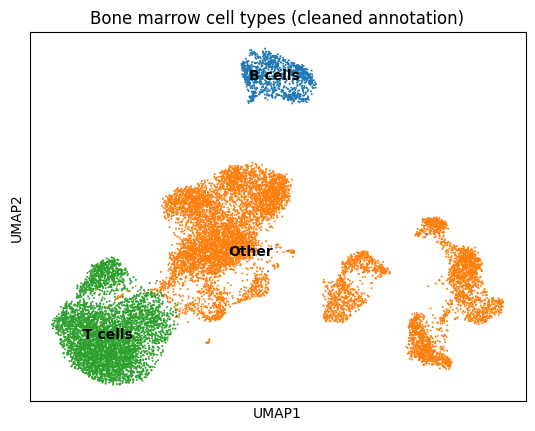

In [40]:
import scanpy as sc

sc.pl.umap(
    adata,
    color='cell_type_clean',
    legend_loc='on data',
    title='Bone marrow cell types (cleaned annotation)'
)
